# Understanding The Distributions of Variables In BdNMC

In [1]:
import numpy as np
import matplotlib.pyplot as plt


me = 0.511 # MeV

## $E_e(\theta)$

In [2]:
def Ee_theta(theta, Ex, mx):
    num = me * ((Ex + me)*(Ex+me)+(Ex**2 - mx**2)*np.cos(theta)**2)
    den = ((Ex + me)**2 - (Ex**2 - mx**2)*np.cos(theta)**2)
    return num / den

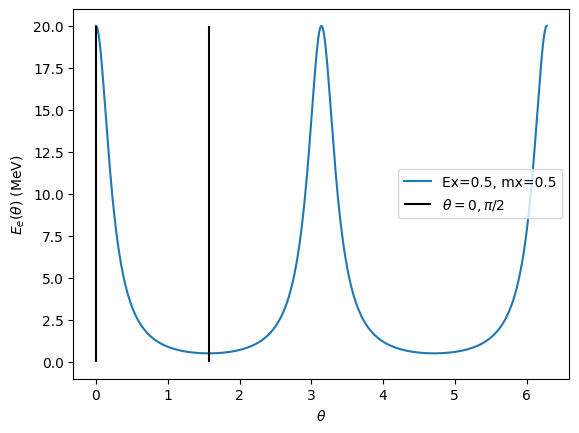

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
theta = np.linspace(0, 2*np.pi, 1000)
ax.plot(theta, Ee_theta(theta, 20, 0.5), label='Ex=0.5, mx=0.5')
ax.vlines([0.0, np.pi/2.0], 0, 20, colors="k", label=r'$\theta=0, \pi/2$')
ax.set(xlabel=r'$\theta$', ylabel=r'$E_e(\theta)$ (MeV)')
ax.legend()
plt.show()


## $\frac{d\sigma}{dE_e}$

In [4]:
kappa = 1e-3
alphaEM = 1/137
alphaD = 0.1
Me = 0.511

def dsigma_dE_fermionic(EDM, Ee, MDM, MDP):
    coef = 4 * np.pi * kappa * kappa * alphaEM * alphaD
    Nominator = (EDM * EDM * Me + EDM * (EDM * Me + 2 * Me * (-Ee + Me)) + (Ee - Me) * ((Ee - 2 * Me) * Me - MDP * MDP))
    Denominator = (((MDP * MDP + 2 * (Ee - Me) * Me)**2) * (EDM * EDM - MDM * MDM))
    ratio = Nominator / Denominator
    return coef * ratio

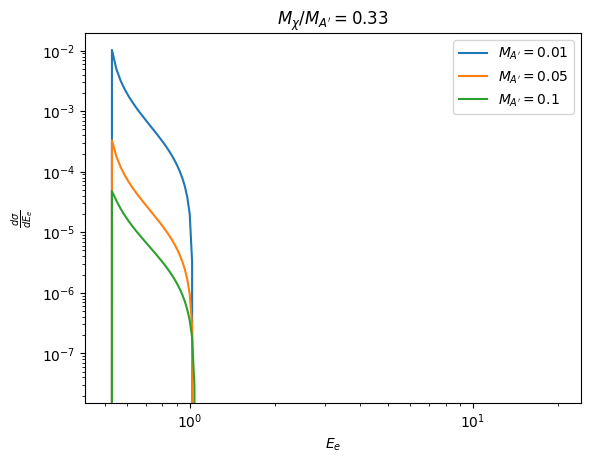

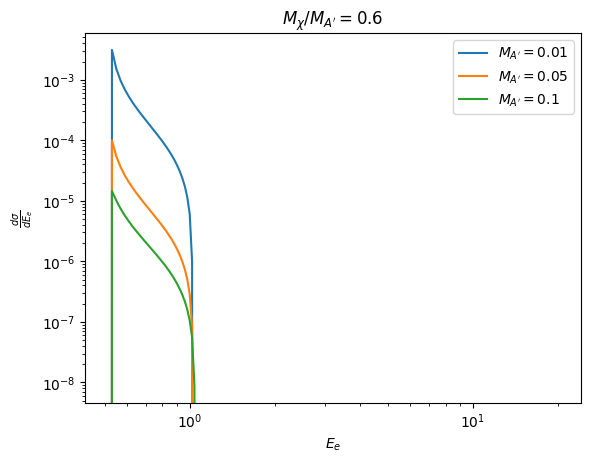

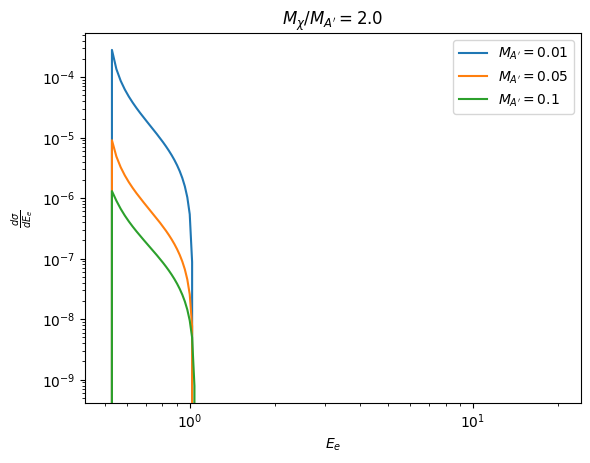

In [8]:

Ee = np.linspace(0.511, 2000, 1000)
EDM = np.linspace(0., 20, 5)

dts = [0.33, 0.6, 2.0]
MAs = [0.01, 0.05, 0.1]
for dt in dts:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for MA in MAs:
        mchi = dt * MA
        ax.plot(Ee, dsigma_dE_fermionic(float(EDM[0]), Ee, mchi, MA), label=r"$M_{A'}=$"+f'{MA}')
        ax.set(xlabel=r'$E_e$', ylabel=r'$\frac{d\sigma}{dE_e}$', title=r"$M_\chi / M_{A'}=$"+f'{dt}')
        ax.legend()
    ax.loglog()
plt.show()


## $\sigma(Ee)$

In [12]:
def sigma_fermionic(Ee, EDM, MDM, MDP):
    # note there is a + C determined by the boundary conditions
    # usually do F2(E_Max) - F2(E_Min)
    denominator = -2.0 * Me*Me * ((EDM*EDM)-(MDM*MDM))
		
    t1 = (-2.0 * Ee * Me)
    t2 = ( (MDP*MDP*MDP*MDP)+ (8.*EDM*EDM*Me*Me) + (2.*MDP*MDP*((2.*EDM*Me) + (Me*Me) + (MDM*MDM))) ) / ((MDP*MDP) + (2. * (Ee-Me) * Me))
    t3 = 2.* ((MDP*MDP) + (2.*EDM*Me) + (Me*Me) + (MDM*MDM)) * np.log((MDP*MDP) + (2.*(Ee-Me)*Me))

    return 18.0 * alphaD * alphaEM * kappa * kappa * np.pi*(t1 + t2 + t3) / denominator

/tmp/ipykernel_14159/2962845639.py:10: RuntimeWarning: divide by zero encountered in divide
  return 18.0 * alphaD * alphaEM * kappa * kappa * np.pi*(t1 + t2 + t3) / denominator


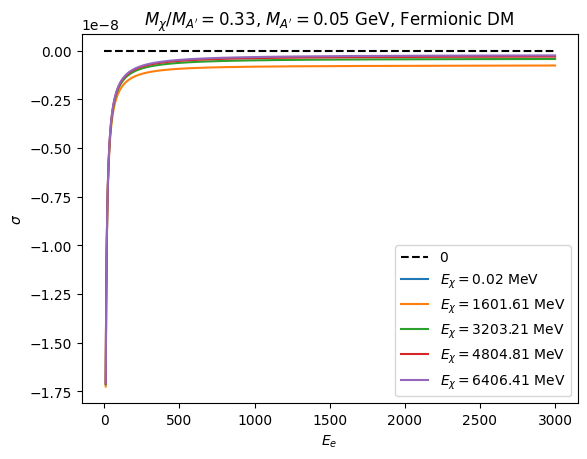

In [55]:
dt = 0.33
MA = 0.05
mchi = dt * MA

Ee = np.linspace(10, 3000, 100000) # 0.01 GeV to 3 GeV is typical for e- at this dt / MA
EDM = np.linspace(mchi, 8000, 1000) # mchi to 8 GeV is typical for 0.33, eta, 0.05 MA


# fixed MA and DT
# vary EMD
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hlines(0, 0, 3000, colors="k", linestyles="--", label='0')
for Echi in EDM[::200]:
    ax.plot(Ee, sigma_fermionic(Ee, float(Echi), mchi, MA), label=r"$E_\chi=$"+f'{round(Echi,2)} MeV')
    ax.set(xlabel=r'$E_e$', ylabel=r'$\sigma$', title=r"$M_\chi / M_{A'}=$"+f'{dt}, '+r"$M_{A'}=$"+f'{MA} GeV, Fermionic DM')
    ax.legend()